# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Connect Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
user_feature = pd.read_csv('/content/drive/MyDrive/Datasets/user_feat_reduct_hakim_murphy.csv')

In [ ]:
user_feature.head()

,user_id,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,...,canceled_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,birthday_trips,session_duration_avg_sec
0,531931,1,0,0,40,147,26,539.822500,0.5,1,...,0.0,1.500000,2.500000,492.500000,2.0,1.500000,1676.630000,2.0,0.0,70.875
1,611065,1,0,0,43,232,25,533.221250,0.5,1,...,0.0,1.500000,1.250000,407.500000,4.0,1.500000,1790.872500,4.0,0.0,146.750
2,586762,1,0,0,37,269,26,377.048333,0.5,1,...,0.0,1.333333,6.333333,1939.666667,3.0,1.333333,762.496667,3.0,0.0,116.375
3,229330,1,1,0,48,313,33,298.138750,0.5,1,...,0.0,1.750000,1.500000,798.250000,4.0,1.750000,720.802500,4.0,0.0,119.625
4,536035,0,0,0,29,313,26,316.920000,0.5,1,...,0.0,1.500000,1.000000,163.000000,2.0,1.500000,931.700000,2.0,0.0,102.750


In [ ]:
user_feat_with_id = user_feature.copy()

In [ ]:
user_feat = user_feature.drop(['user_id', 'birthday_trips'], axis=1).copy()

In [ ]:
user_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    5782 non-null   int64  
 1   married                   5782 non-null   int64  
 2   has_children              5782 non-null   int64  
 3   age                       5782 non-null   int64  
 4   birthday_dayofyear        5782 non-null   int64  
 5   tenure_months             5782 non-null   int64  
 6   avg_booking_value         5782 non-null   float64
 7   hotel_booking_freq        5782 non-null   float64
 8   checked_bag               5782 non-null   int64  
 9   search_to_book            5782 non-null   float64
 10  price_sensitive           5782 non-null   float64
 11  time_since_last_booking   5782 non-null   float64
 12  amount_of_trips           5782 non-null   int64  
 13  canceled_trips            5782 non-null   float64
 14  rooms   

# Groups from non-clustering

In [ ]:
user_feat_canceled = user_feat[user_feat['canceled_trips'] != 0].copy()

In [ ]:
user_feat_canceled

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,amount_of_trips,canceled_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec
12,1,0,0,35,297,26,162.7425,0.500000,1,0.50,...,4,1.0,1.0,2.50,307.50,2.0,1.0,199.485,2.0,158.333333
18,1,0,0,27,298,26,315.0500,0.500000,0,0.50,...,4,1.0,1.0,1.50,322.50,2.0,1.0,420.600,2.0,119.166667
36,1,0,0,37,224,26,248.1000,0.500000,0,0.50,...,4,1.0,1.0,3.00,103.50,2.0,1.0,461.700,2.0,104.833333
48,0,0,0,44,105,25,203.8425,0.666667,1,0.75,...,6,1.0,1.0,5.75,586.25,4.0,1.0,301.685,2.0,133.166667
51,0,1,1,46,45,26,310.1400,0.500000,0,0.50,...,4,1.0,1.0,6.50,1333.50,2.0,1.0,404.780,2.0,179.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,1,0,0,28,276,25,197.5400,0.500000,0,0.50,...,4,1.0,2.0,3.50,1970.00,2.0,2.0,626.460,2.0,129.000000
5744,0,0,1,19,233,27,0.0000,0.000000,0,0.00,...,2,1.0,0.0,0.00,0.00,0.0,0.0,0.000,0.0,143.000000
5746,1,0,0,50,206,28,288.2050,0.500000,1,0.25,...,5,2.0,1.0,5.00,1570.00,1.0,1.0,262.410,1.0,157.250000
5750,1,0,0,18,246,26,85.5850,0.500000,1,0.25,...,3,1.0,1.0,2.00,146.00,1.0,1.0,98.170,1.0,65.333333


In [ ]:
user_feat.drop(columns=['canceled_trips'], inplace=True)

In [ ]:
user_feat

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,time_since_last_booking,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec
0,1,0,0,40,147,26,539.822500,0.500000,1,0.500000,...,721.0,2,1.500000,2.500000,492.500000,2.0,1.500000,1676.630000,2.0,70.875000
1,1,0,0,43,232,25,533.221250,0.500000,1,1.000000,...,637.0,4,1.500000,1.250000,407.500000,4.0,1.500000,1790.872500,4.0,146.750000
2,1,0,0,37,269,26,377.048333,0.500000,1,0.750000,...,732.0,3,1.333333,6.333333,1939.666667,3.0,1.333333,762.496667,3.0,116.375000
3,1,1,0,48,313,33,298.138750,0.500000,1,1.000000,...,623.0,4,1.750000,1.500000,798.250000,4.0,1.750000,720.802500,4.0,119.625000
4,0,0,0,29,313,26,316.920000,0.500000,1,0.500000,...,779.0,2,1.500000,1.000000,163.000000,2.0,1.500000,931.700000,2.0,102.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,1,0,42,360,25,342.425000,0.666667,1,0.375000,...,759.0,2,1.000000,3.500000,466.000000,2.0,1.000000,546.350000,1.0,115.125000
5778,1,0,0,35,172,27,464.412000,0.500000,1,1.250000,...,445.0,5,1.600000,4.600000,741.800000,5.0,1.800000,1541.054000,5.0,179.875000
5779,1,1,0,48,197,25,391.670000,0.333333,1,0.375000,...,695.0,2,1.000000,4.000000,1040.000000,1.0,1.000000,523.340000,2.0,112.500000
5780,1,1,1,55,207,26,286.073333,0.400000,1,0.555556,...,761.0,3,1.000000,0.000000,0.000000,2.0,1.333333,449.743333,3.0,150.111111


In [ ]:
user_feat_graduating = user_feat[user_feat['age'] == 18].copy()

In [ ]:
user_feat_graduating

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,time_since_last_booking,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec
49,1,0,0,18,258,26,0.000000,0.000000,0,0.000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,116.555556
78,0,0,0,18,340,25,2081.845000,0.333333,1,0.375,...,346.0,2,1.0,1.0,394.0,1.0,2.0,11180.520000,2.0,110.625000
108,1,0,0,18,252,27,370.863333,0.250000,0,0.500,...,646.0,3,1.0,1.0,-137.0,1.0,1.0,604.726667,3.0,96.375000
140,1,0,0,18,197,26,175.500000,1.000000,0,0.250,...,750.0,2,1.5,11.5,8560.0,2.0,0.0,0.000000,0.0,84.875000
171,1,0,0,18,299,26,343.405000,0.500000,0,0.250,...,761.0,1,1.0,1.0,146.0,1.0,1.0,540.810000,1.0,85.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,1,0,0,18,313,26,0.000000,0.000000,0,0.000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,87.625000
5656,1,0,0,18,124,26,0.000000,0.000000,0,0.000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,71.250000
5667,1,0,0,18,156,26,46.500000,1.000000,0,0.125,...,791.0,1,1.0,10.0,930.0,1.0,0.0,0.000000,0.0,98.875000
5750,1,0,0,18,246,26,85.585000,0.500000,1,0.250,...,801.0,3,1.0,2.0,146.0,1.0,1.0,98.170000,1.0,65.333333


In [ ]:
user_feat_graduating['checked_bag'].value_counts(normalize=True)

,proportion
checked_bag,
0,0.77931
1,0.22069


In [ ]:
user_feat = user_feat[user_feat['age'] != 18].copy()

In [ ]:
user_feat = user_feat.copy()

In [ ]:
user_feat

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,time_since_last_booking,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec
0,1,0,0,40,147,26,539.822500,0.500000,1,0.500000,...,721.0,2,1.500000,2.500000,492.500000,2.0,1.500000,1676.630000,2.0,70.875000
1,1,0,0,43,232,25,533.221250,0.500000,1,1.000000,...,637.0,4,1.500000,1.250000,407.500000,4.0,1.500000,1790.872500,4.0,146.750000
2,1,0,0,37,269,26,377.048333,0.500000,1,0.750000,...,732.0,3,1.333333,6.333333,1939.666667,3.0,1.333333,762.496667,3.0,116.375000
3,1,1,0,48,313,33,298.138750,0.500000,1,1.000000,...,623.0,4,1.750000,1.500000,798.250000,4.0,1.750000,720.802500,4.0,119.625000
4,0,0,0,29,313,26,316.920000,0.500000,1,0.500000,...,779.0,2,1.500000,1.000000,163.000000,2.0,1.500000,931.700000,2.0,102.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,1,0,42,360,25,342.425000,0.666667,1,0.375000,...,759.0,2,1.000000,3.500000,466.000000,2.0,1.000000,546.350000,1.0,115.125000
5778,1,0,0,35,172,27,464.412000,0.500000,1,1.250000,...,445.0,5,1.600000,4.600000,741.800000,5.0,1.800000,1541.054000,5.0,179.875000
5779,1,1,0,48,197,25,391.670000,0.333333,1,0.375000,...,695.0,2,1.000000,4.000000,1040.000000,1.0,1.000000,523.340000,2.0,112.500000
5780,1,1,1,55,207,26,286.073333,0.400000,1,0.555556,...,761.0,3,1.000000,0.000000,0.000000,2.0,1.333333,449.743333,3.0,150.111111


# Scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(user_feat)
df_scaled

array([[ 0.34601977, -0.91082423, -0.69865612, ...,  0.87771283,
        -0.15391575, -1.25765531],
       [ 0.34601977, -0.91082423, -0.69865612, ...,  0.96848841,
         1.17374007,  0.86820824],
       [ 0.34601977, -0.91082423, -0.69865612, ...,  0.15135455,
         0.50991216,  0.01716237],
       ...,
       [ 0.34601977,  1.09790667, -0.69865612, ..., -0.03867617,
        -0.15391575, -0.09140727],
       [ 0.34601977,  1.09790667,  1.43131931, ..., -0.09715511,
         0.50991216,  0.96237976],
       [ 0.34601977,  1.09790667,  1.43131931, ..., -0.06787327,
        -0.15391575, -0.89692393]])

# PCA

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 8.75681888e-01,  1.83179690e+00, -1.11124713e+00, ...,
        -1.02137588e-01,  2.65352780e-02, -3.17119989e-16],
       [ 3.00863408e+00, -1.83447904e-01, -1.46024031e+00, ...,
        -1.50718370e-02,  4.87331860e-02, -8.89777904e-17],
       [ 1.66334506e+00,  6.33772458e-01,  7.37369629e-01, ...,
        -1.02285036e-01,  2.95804135e-02, -3.49098888e-17],
       ...,
       [-3.18883136e-01,  9.70854799e-01, -4.60664848e-01, ...,
        -6.94625787e-02,  1.78441497e-02, -8.58444320e-17],
       [ 5.98681101e-01, -6.04992859e-01, -1.10836102e+00, ...,
         2.08647584e-01, -1.24604805e-01,  2.29655041e-16],
       [-1.78949322e-01,  1.82066656e+00,  1.55773073e+00, ...,
        -6.22534337e-02,  1.73138228e-02, -2.21591405e-16]])

In [ ]:
pca.explained_variance_ratio_

array([0.28026135, 0.13195579, 0.11564828, 0.06898343, 0.05082335,
       0.04839033, 0.04710051, 0.04641392, 0.04511496, 0.03339912,
       0.02916778, 0.02562815, 0.02556385, 0.01471589, 0.01383819,
       0.00740696, 0.00682722, 0.00663173, 0.00183212, 0.00029707,
       0.        ])

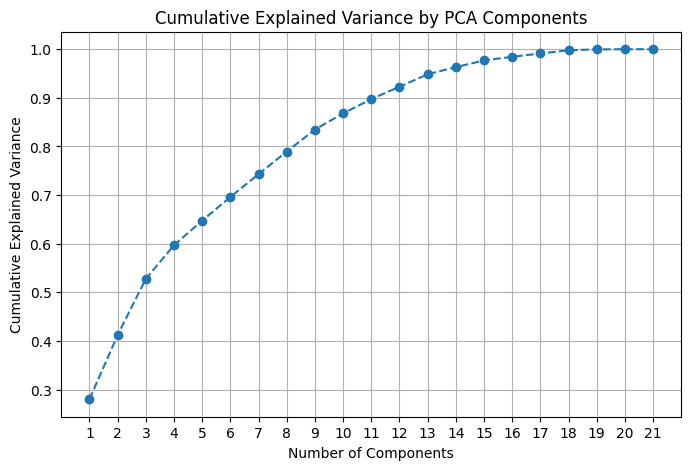

In [ ]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(list(range(1, len(cumulative_variance) + 1)), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [ ]:
pca_result = pca_result[:, :8]
pca_result

array([[ 0.87568189,  1.8317969 , -1.11124713, ..., -0.20144911,
         0.85947815, -0.12007301],
       [ 3.00863408, -0.1834479 , -1.46024031, ..., -0.14611269,
         0.37577841, -1.1723961 ],
       [ 1.66334506,  0.63377246,  0.73736963, ...,  0.75232525,
        -0.18101627, -0.70839379],
       ...,
       [-0.31888314,  0.9708548 , -0.46066485, ..., -0.30395901,
         0.33790427, -0.6180227 ],
       [ 0.5986811 , -0.60499286, -1.10836102, ..., -0.10994968,
         0.7018641 , -0.35077619],
       [-0.17894932,  1.82066656,  1.55773073, ..., -0.05329994,
         0.36488559, -1.16533912]])

# KMeans

In [ ]:
X = pca_result

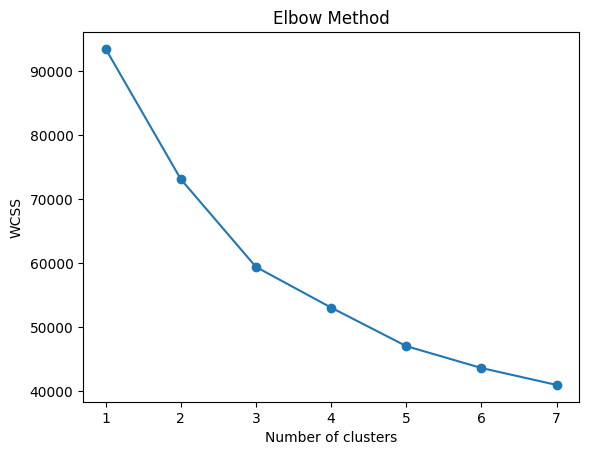

In [ ]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different k values
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10000, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10000, random_state=42)

In [ ]:
user_feat['cluster'] = kmeans.labels_
user_feat

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec,cluster
0,1,0,0,40,147,26,539.822500,0.500000,1,0.500000,...,2,1.500000,2.500000,492.500000,2.0,1.500000,1676.630000,2.0,70.875000,0
1,1,0,0,43,232,25,533.221250,0.500000,1,1.000000,...,4,1.500000,1.250000,407.500000,4.0,1.500000,1790.872500,4.0,146.750000,1
2,1,0,0,37,269,26,377.048333,0.500000,1,0.750000,...,3,1.333333,6.333333,1939.666667,3.0,1.333333,762.496667,3.0,116.375000,1
3,1,1,0,48,313,33,298.138750,0.500000,1,1.000000,...,4,1.750000,1.500000,798.250000,4.0,1.750000,720.802500,4.0,119.625000,1
4,0,0,0,29,313,26,316.920000,0.500000,1,0.500000,...,2,1.500000,1.000000,163.000000,2.0,1.500000,931.700000,2.0,102.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,1,0,42,360,25,342.425000,0.666667,1,0.375000,...,2,1.000000,3.500000,466.000000,2.0,1.000000,546.350000,1.0,115.125000,0
5778,1,0,0,35,172,27,464.412000,0.500000,1,1.250000,...,5,1.600000,4.600000,741.800000,5.0,1.800000,1541.054000,5.0,179.875000,1
5779,1,1,0,48,197,25,391.670000,0.333333,1,0.375000,...,2,1.000000,4.000000,1040.000000,1.0,1.000000,523.340000,2.0,112.500000,0
5780,1,1,1,55,207,26,286.073333,0.400000,1,0.555556,...,3,1.000000,0.000000,0.000000,2.0,1.333333,449.743333,3.0,150.111111,1


In [ ]:
user_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5781
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    5637 non-null   int64  
 1   married                   5637 non-null   int64  
 2   has_children              5637 non-null   int64  
 3   age                       5637 non-null   int64  
 4   birthday_dayofyear        5637 non-null   int64  
 5   tenure_months             5637 non-null   int64  
 6   avg_booking_value         5637 non-null   float64
 7   hotel_booking_freq        5637 non-null   float64
 8   checked_bag               5637 non-null   int64  
 9   search_to_book            5637 non-null   float64
 10  price_sensitive           5637 non-null   float64
 11  time_since_last_booking   5637 non-null   float64
 12  amount_of_trips           5637 non-null   int64  
 13  rooms                     5637 non-null   float64
 14  nights       

In [ ]:
user_feat['cluster'].value_counts()

,count
cluster,
1,2699
0,2393
2,545


In [ ]:
user_feat.groupby('cluster').mean()

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,time_since_last_booking,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.887589,0.474718,0.401170,42.466360,184.280401,26.165065,265.683850,0.582500,0.515671,0.362671,...,712.470121,2.014626,1.175024,4.273053,945.013163,1.629336,0.974857,449.295337,1.336398,102.217584
1,0.894035,0.441275,0.265654,44.514635,183.970730,26.333086,334.018306,0.498927,0.930345,0.843373,...,667.246017,4.009633,1.203953,3.132082,661.114286,3.461282,1.219625,788.790325,3.453501,134.176075
2,0.873394,0.420183,0.315596,40.888073,178.016514,26.150459,17.926486,0.000000,0.051376,0.013940,...,74.223853,0.442202,0.000000,0.000000,0.000000,0.000000,0.115596,37.316202,0.113761,84.045933


In [ ]:
user_feat.describe()

,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,search_to_book,...,amount_of_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,session_duration_avg_sec,cluster
count,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,...,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000,5637.000000
mean,0.889303,0.453433,0.328011,43.294483,183.526521,26.244101,274.448607,0.486167,0.669328,0.559115,...,2.817811,1.075271,3.313625,717.715799,2.348944,1.008977,572.014575,2.231861,115.762451,0.672166
std,0.319944,0.497871,0.469531,11.524615,103.970057,1.177482,214.241338,0.217738,0.470497,0.347072,...,1.562280,0.495457,2.882973,909.282715,1.448221,0.540425,1258.627401,1.506548,35.694544,0.643271
min,0.000000,0.000000,0.000000,19.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-477.000000,0.000000,0.000000,0.000000,0.000000,31.500000,0.000000
25%,1.000000,0.000000,0.000000,36.000000,95.000000,26.000000,179.870000,0.444444,0.000000,0.250000,...,2.000000,1.000000,1.500000,229.666667,1.000000,1.000000,203.792500,1.000000,91.125000,0.000000
50%,1.000000,0.000000,0.000000,43.000000,187.000000,26.000000,259.078333,0.500000,1.000000,0.500000,...,3.000000,1.000000,2.750000,482.000000,2.000000,1.000000,367.870000,2.000000,112.000000,1.000000
75%,1.000000,1.000000,1.000000,50.000000,271.000000,27.000000,343.140000,0.555556,1.000000,0.750000,...,4.000000,1.250000,4.500000,877.333333,3.000000,1.200000,586.880000,3.000000,136.375000,1.000000
max,2.000000,1.000000,1.000000,89.000000,363.000000,38.000000,4621.575000,1.000000,1.000000,1.875000,...,9.000000,4.000000,30.000000,14057.000000,8.000000,6.000000,41666.050000,8.000000,431.333333,2.000000


# Clusters Analysis

In [ ]:
# for col in user_feat.columns:
#     sns.boxplot(data=user_feat,y=col, hue='cluster')
#     plt.show()

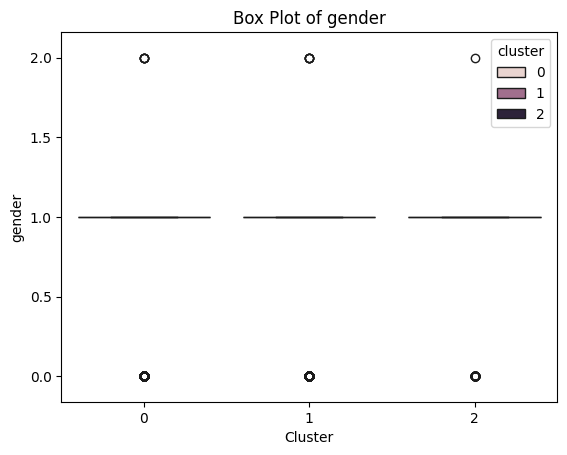

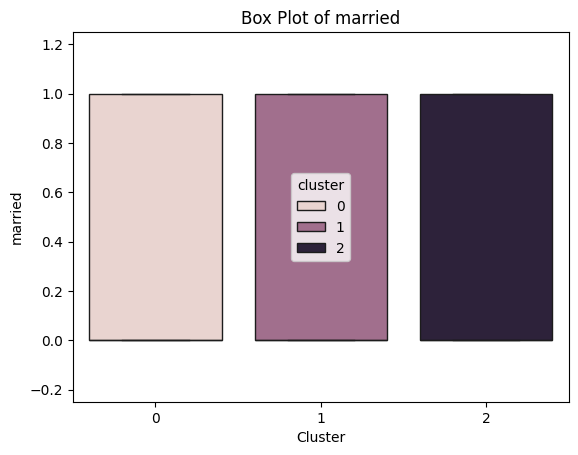

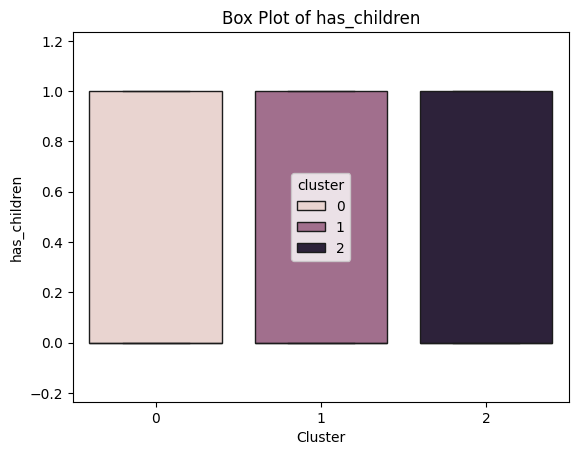

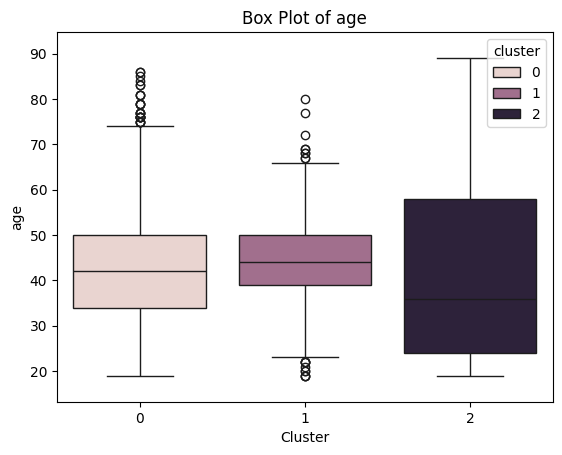

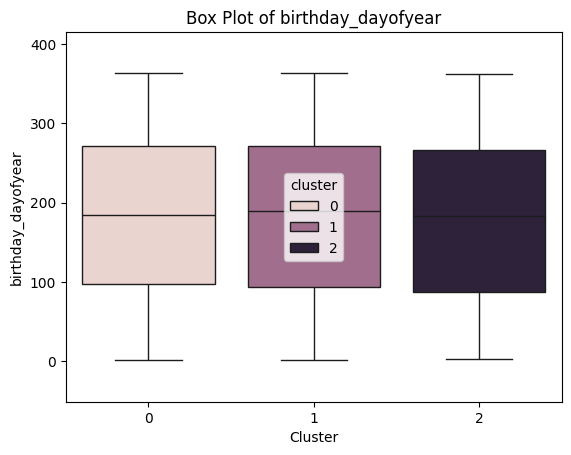

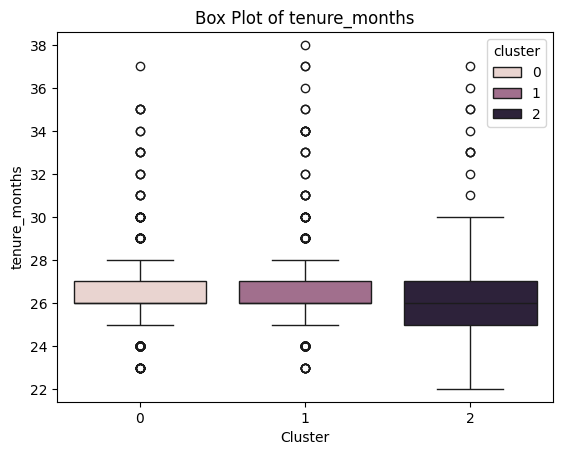

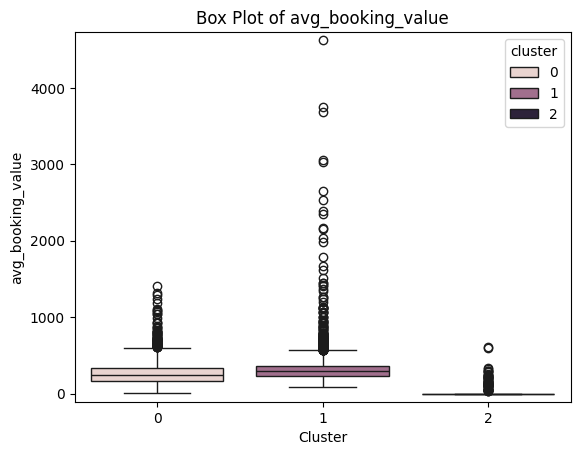

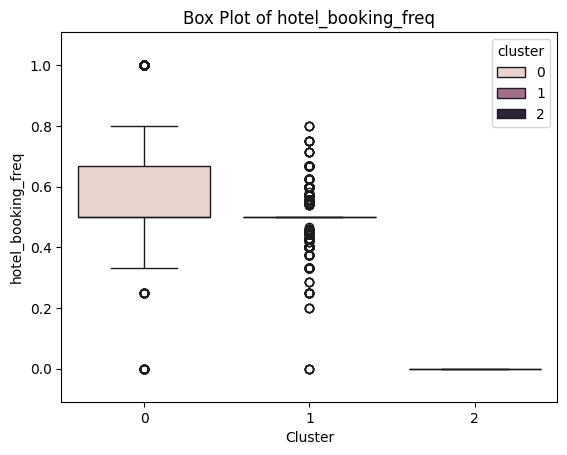

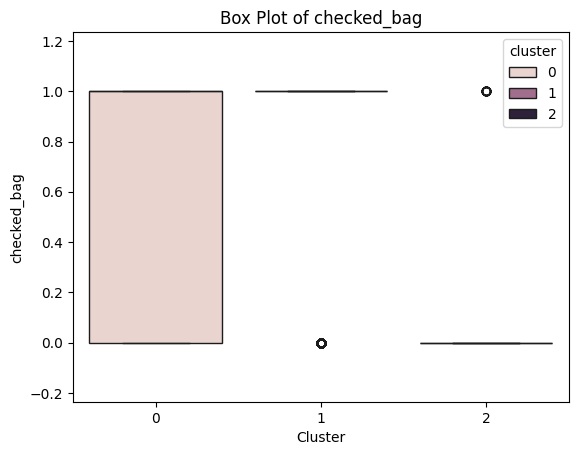

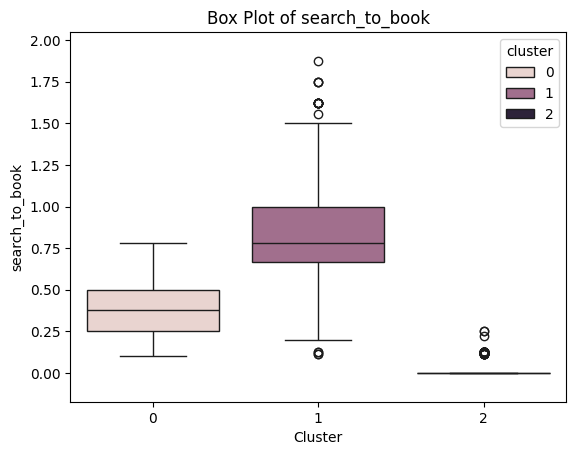

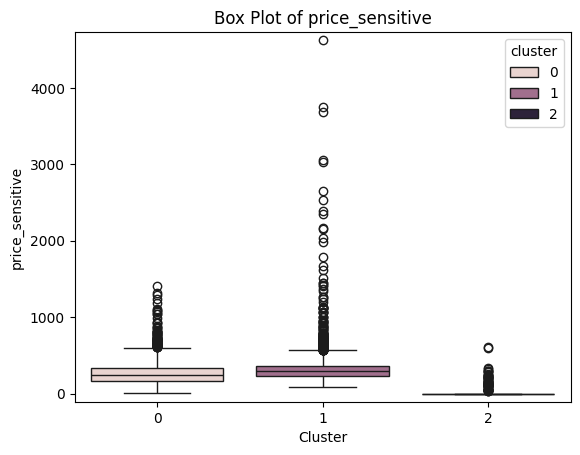

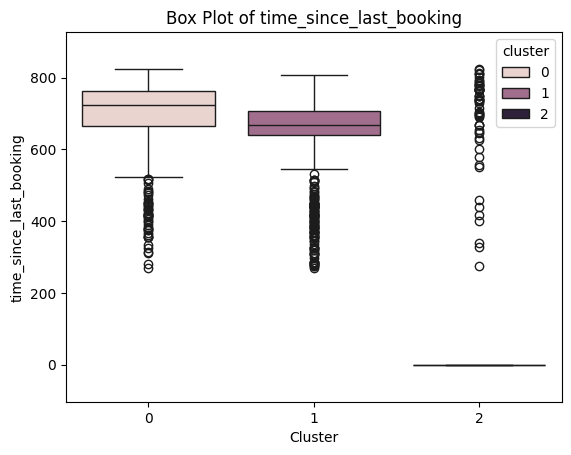

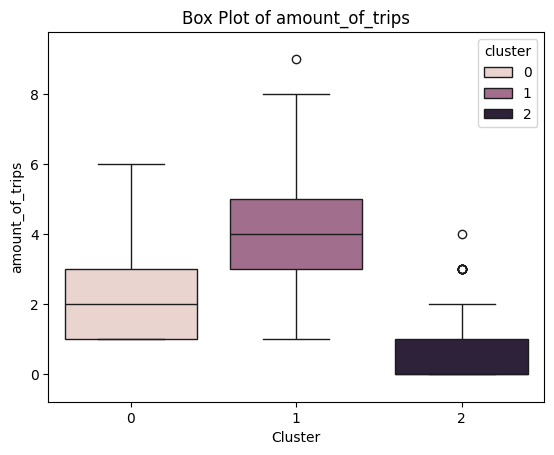

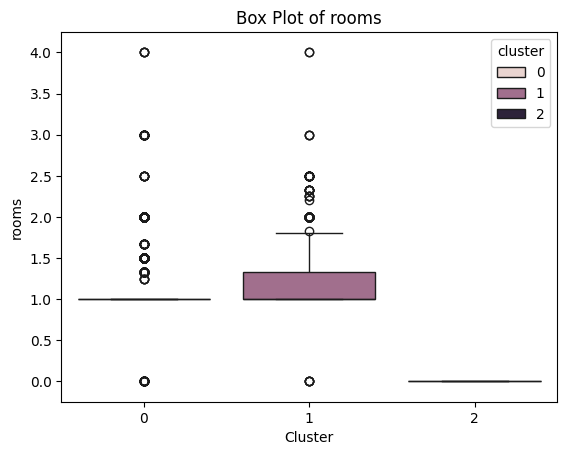

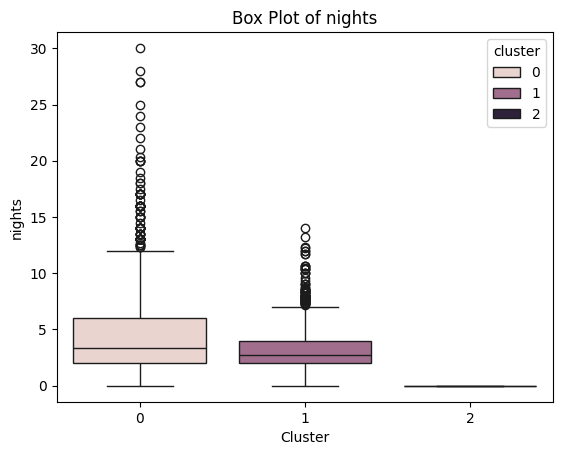

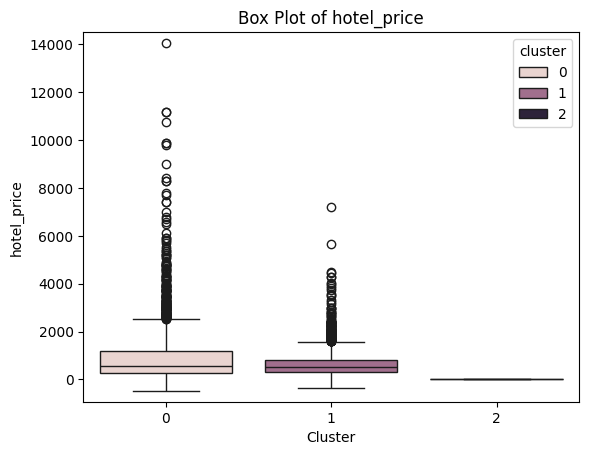

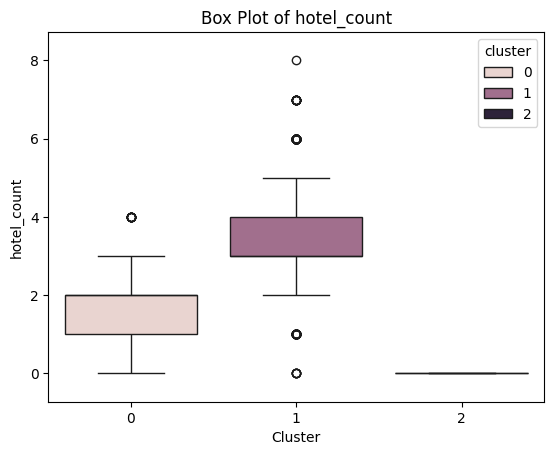

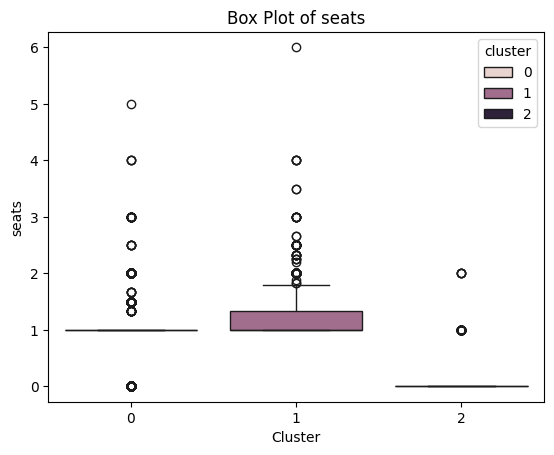

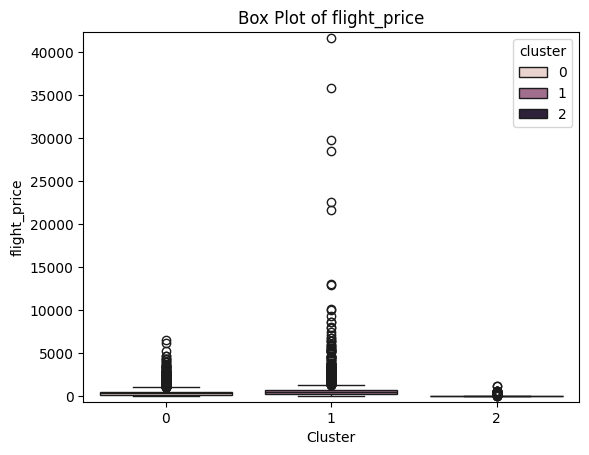

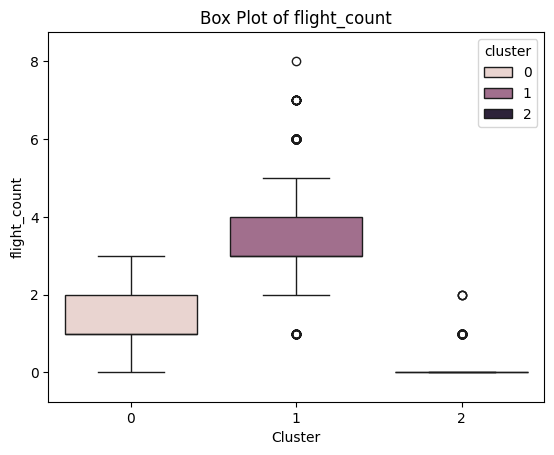

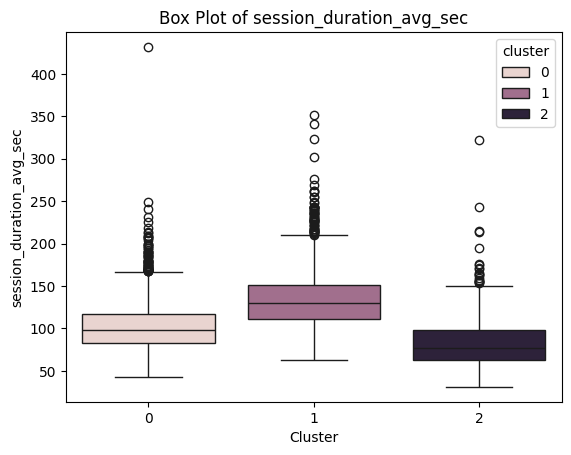

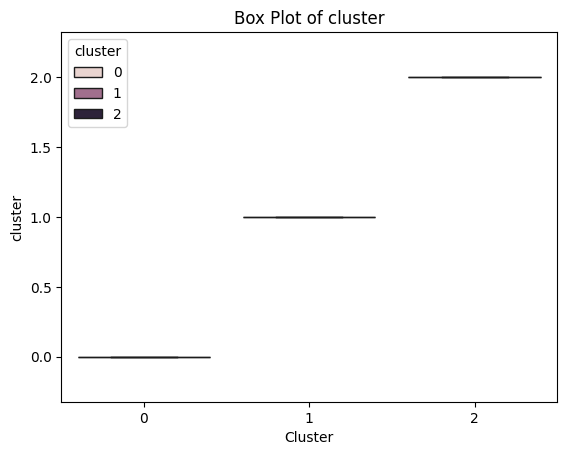

In [ ]:
# cluster_labels = {0: "High-Value Frequent", 1: "Budget-Conscious", 2: "Infrequent"}

for col in user_feat.columns:
    fig, ax = plt.subplots()
    sns.boxplot(data=user_feat, y=col, x='cluster', hue='cluster', ax=ax)  # Use x='cluster'
    ax.set_title(f'Box Plot of {col}')

    # Dynamically adjust y-axis limits
    lower_limit = user_feat[col].min() - (user_feat[col].std()/2)
    upper_limit = user_feat[col].max() + (user_feat[col].std()/2)
    ax.set_ylim(lower_limit, upper_limit)


    ax.set_xlabel("Cluster") # Change x-axis label to "Cluster"
    plt.show()

In [ ]:
user_feat['pca_0'] = pca_result[:, 0]  # First principal component
user_feat['pca_1'] = pca_result[:, 1]  # Second principal component

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.21831693289388696


# Cluster 0  (High-Value Occasional Travelers):

## These users seem to have a higher average booking value, travel occasionally, might be business travelers, and are likely older and use checked bags more often.

- Business Class Upgrades: Offer discounts on business class upgrades or premium economy seats to enhance their travel experience.
- Lounge Access: Provide complimentary lounge access or discounts on lounge memberships for added comfort during layovers.
- Priority Boarding/Baggage: Offer priority boarding and baggage handling to save them time.
- Free Checked Bag: Offer a free checked bag to enhance the convenience of travel.
- Loyalty Program Bonuses: Award extra points or miles in your loyalty program for their frequent travel.
- Partnership Discounts: Offer discounts with car rental agencies, hotels, or other travel-related services that cater to business travelers.
- Weekend Getaway Deals: Offer special packages for weekend trips to nearby destinations to encourage more frequent travel.

# Cluster 1 (Frequent Travelers):

## These users seem to travel frequently and an average booking value with a high variance. They are more likely to be flexible in their travel plans.

- Percentage-Based Discounts: Offer discounts on economy class fares, such as 10% or 15% off.
- Early Bird Discounts: Provide discounts for booking flights well in advance.
- Promotional Codes: Provide exclusive promotional codes for discounts on specific routes or travel periods.
- Group Discounts: Offer discounts for group bookings to cater to friends or family traveling together.
- Budget Airline Partnerships: Collaborate with budget airlines to provide more affordable travel options.
- Flexibility Discounts: They might need more flexibility regarding their plans; offer discounts on flexible tickets or waived change fees.

# Cluster 2 (Infrequent Travelers):

## These are infrequent travelers and have a lower average booking value with a high standard deviation, they are not sensitive to the price and might only travel once or twice a year.

- Significant Discounts: Offer substantial discounts on flights or travel packages to incentivize them to book more trips.
- Last-Minute Deals: Promote flash sales or last-minute deals to capture their attention.
- Destination-Specific Discounts: Offer discounts to popular destinations that might spark their interest in traveling.
- Travel Package Bundles: Provide discounts on flight and hotel packages to simplify their booking process and offer value.
- Free Upgrade: Offer a free upgrade to the next cabin class, this will enhance the experience and ensure they will come back.
- Referral Program: Incentivize them to bring friends or family for travel with a referral bonus or discount.

# Plots for Analysis

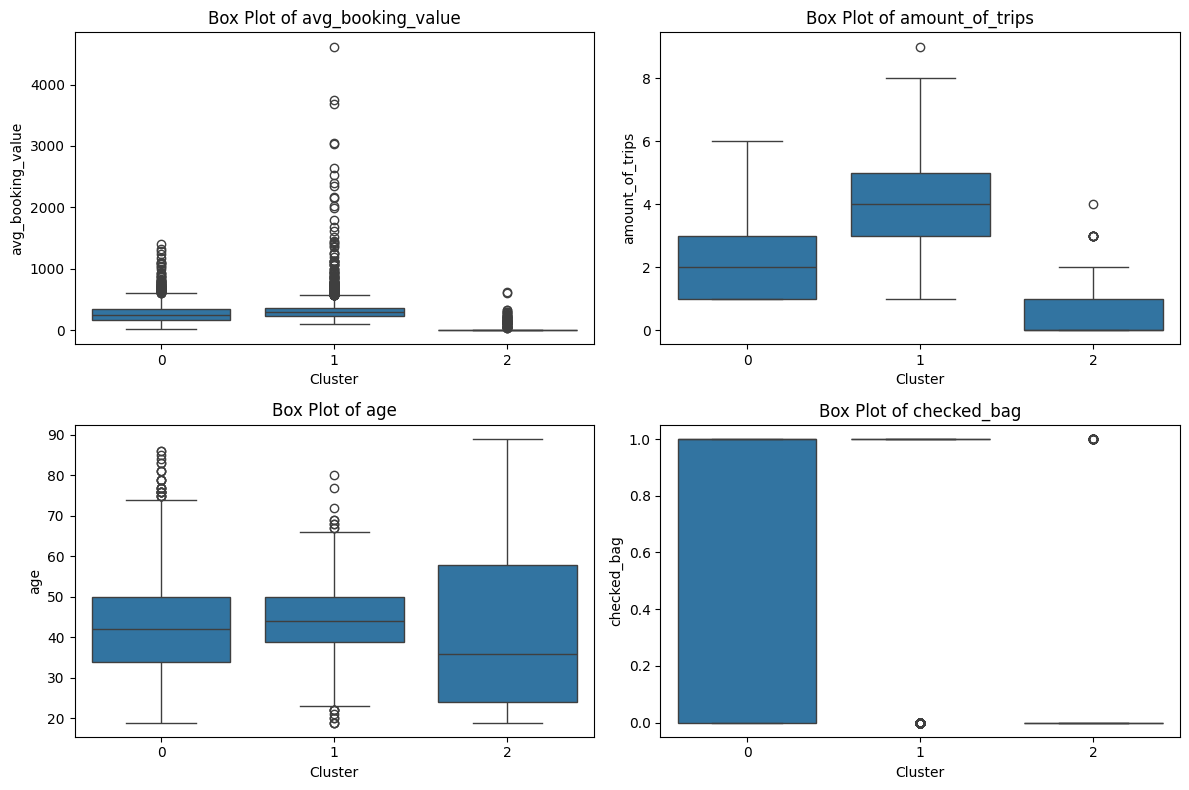

In [ ]:
# Features to plot
features = ['avg_booking_value', 'amount_of_trips', 'age', 'checked_bag']

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize as needed
axes = axes.flatten()

# Iterate through features and plot box plots
for i, feature in enumerate(features):
    sns.boxplot(data=user_feat, x='cluster', y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Box Plots with Cluster Labels:

- These plots show the distribution of different features (e.g., avg_booking_value, amount_of_trips, age, checked_bag) across clusters.
- Support for Discounts:
-- Cluster 0 (High-Value Ooccasional): Box plots showing higher avg_booking_value and amount_of_trips compared to other clusters would support offering business class upgrades, lounge access, and loyalty program bonuses.
-- Cluster 1 (Budget-Conscious): Box plots showing lower avg_booking_value and a preference for economy class would support offering percentage-based discounts, early bird discounts, and weekend getaway deals.
-- Cluster 2 (Infrequent): Box plots showing infrequent travel patterns and potentially higher variability in spending would support offering significant discounts, last-minute deals, and travel package bundles.

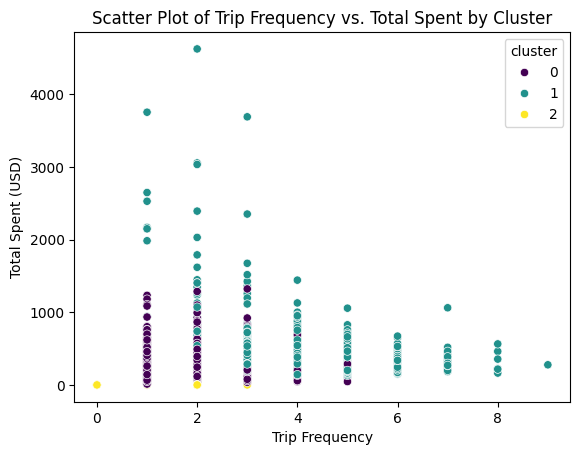

In [ ]:
sns.scatterplot(data=user_feat, x='amount_of_trips', y='avg_booking_value', hue='cluster', palette='viridis')
plt.title('Scatter Plot of Trip Frequency vs. Total Spent by Cluster')
plt.xlabel('Trip Frequency')
plt.ylabel('Total Spent (USD)')
plt.show()

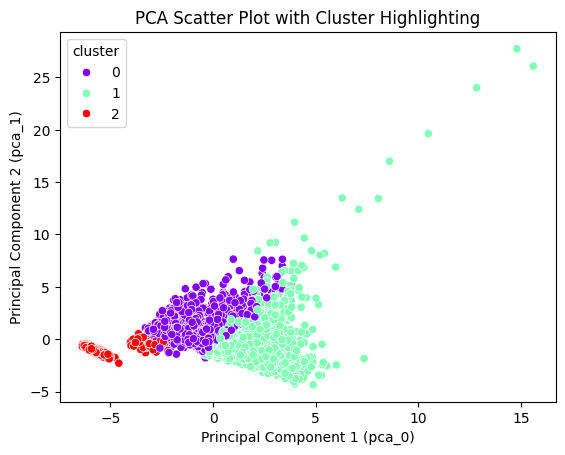

In [ ]:
# Create the scatter plot
sns.scatterplot(data=user_feat, x='pca_0', y='pca_1', hue='cluster', palette='rainbow', legend='full')

# Set plot title and labels
plt.title('PCA Scatter Plot with Cluster Highlighting')
plt.xlabel('Principal Component 1 (pca_0)')
plt.ylabel('Principal Component 2 (pca_1)')

# Show the plot
plt.show()

# Perk Mapping

In [ ]:
perk_mapping = {
       0: ['Free Checked Bag', 'Lounge Access', 'Business Class Upgrade'],  # High-Value Occasional
       1: ['Percentage-Based Discounts', 'Early Bird Discounts', 'Flexibility Discounts'],  # Frequent Travelers
       2: ['Significant Discounts', 'Last-Minute Deals', 'Travel Package Bundles'],  # Infrequent Travelers
   }

user_feat['perks'] = user_feat['cluster'].map(perk_mapping)


In [ ]:
perk_df = user_feat['perks'].apply(pd.Series)
perk_df = perk_df.add_prefix('perk_')

In [ ]:
perk_df

,perk_0,perk_1,perk_2
0,Free Checked Bag,Lounge Access,Business Class Upgrade
1,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
2,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
3,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
4,Free Checked Bag,Lounge Access,Business Class Upgrade
...,...,...,...
5777,Free Checked Bag,Lounge Access,Business Class Upgrade
5778,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
5779,Free Checked Bag,Lounge Access,Business Class Upgrade
5780,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts


# Merging and Printing Dataframes

In [ ]:
user_feat_merged = pd.concat([user_feat_with_id, perk_df], axis=1)

In [ ]:
user_feat_merged

,user_id,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,...,hotel_price,hotel_count,seats,flight_price,flight_count,birthday_trips,session_duration_avg_sec,perk_0,perk_1,perk_2
0,531931,1,0,0,40,147,26,539.822500,0.500000,1,...,492.500000,2.0,1.500000,1676.630000,2.0,0.0,70.875000,Free Checked Bag,Lounge Access,Business Class Upgrade
1,611065,1,0,0,43,232,25,533.221250,0.500000,1,...,407.500000,4.0,1.500000,1790.872500,4.0,0.0,146.750000,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
2,586762,1,0,0,37,269,26,377.048333,0.500000,1,...,1939.666667,3.0,1.333333,762.496667,3.0,0.0,116.375000,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
3,229330,1,1,0,48,313,33,298.138750,0.500000,1,...,798.250000,4.0,1.750000,720.802500,4.0,0.0,119.625000,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
4,536035,0,0,0,29,313,26,316.920000,0.500000,1,...,163.000000,2.0,1.500000,931.700000,2.0,0.0,102.750000,Free Checked Bag,Lounge Access,Business Class Upgrade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,591155,0,1,0,42,360,25,342.425000,0.666667,1,...,466.000000,2.0,1.000000,546.350000,1.0,0.0,115.125000,Free Checked Bag,Lounge Access,Business Class Upgrade
5778,521235,1,0,0,35,172,27,464.412000,0.500000,1,...,741.800000,5.0,1.800000,1541.054000,5.0,1.0,179.875000,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts
5779,600351,1,1,0,48,197,25,391.670000,0.333333,1,...,1040.000000,1.0,1.000000,523.340000,2.0,0.0,112.500000,Free Checked Bag,Lounge Access,Business Class Upgrade
5780,577044,1,1,1,55,207,26,286.073333,0.400000,1,...,0.000000,2.0,1.333333,449.743333,3.0,0.0,150.111111,Percentage-Based Discounts,Early Bird Discounts,Flexibility Discounts


In [ ]:
# from google.colab import files

# # Save the cleaned dataset locally
# user_feat_merged = user_feat_merged.copy()
# student_name = 'hakim_murphy' #introduce your name here joining the surname with a _
# user_feat_merged.to_csv(f'user_feat_merged_{student_name}.csv', index=False)

# # Allow download for manual upload
# files.download(f'user_feat_merged_{student_name}.csv')


In [ ]:
user_feat_canceled = pd.merge(user_feat_with_id, user_feat_with_id[user_feat_with_id['canceled_trips'] != 0][['user_id', 'canceled_trips']], on='user_id', how='inner')

In [ ]:
user_feat_canceled.T

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
user_id,577541.000000,545879.000000,553985.000000,651491.000000,529602.00,204997.000000,561846.000000,220725.000000,552653.000000,584787.000000,...,610763.000000,525022.000000,581729.000,546395.000000,694265.000000,608086.00,511552.0,452034.000,557834.000000,331039.0
gender,1.000000,1.000000,1.000000,0.000000,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000,1.000000,1.000000,1.00,0.0,1.000,1.000000,1.0
married,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000,1.000000,1.000000,0.00,0.0,0.000,0.000000,1.0
has_children,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000,1.000000,1.000000,0.00,1.0,0.000,0.000000,1.0
age,35.000000,27.000000,37.000000,44.000000,46.00,39.000000,41.000000,41.000000,60.000000,66.000000,...,26.000000,49.000000,68.000,44.000000,30.000000,28.00,19.0,50.000,18.000000,45.0
birthday_dayofyear,297.000000,298.000000,224.000000,105.000000,45.00,238.000000,338.000000,209.000000,25.000000,202.000000,...,8.000000,220.000000,140.000,143.000000,169.000000,276.00,233.0,206.000,246.000000,214.0
tenure_months,26.000000,26.000000,26.000000,25.000000,26.00,34.000000,26.000000,33.000000,26.000000,26.000000,...,25.000000,27.000000,26.000,26.000000,24.000000,25.00,27.0,28.000,26.000000,30.0
avg_booking_value,162.742500,315.050000,248.100000,203.842500,310.14,157.617500,287.322500,325.570000,113.515000,61.500000,...,203.305000,180.490000,0.000,249.738333,0.000000,197.54,0.0,288.205,85.585000,0.0
hotel_booking_freq,0.500000,0.500000,0.500000,0.666667,0.50,0.333333,0.600000,0.400000,0.500000,1.000000,...,0.500000,0.666667,0.000,0.500000,0.000000,0.50,0.0,0.500,0.500000,0.0
checked_bag,1.000000,0.000000,0.000000,1.000000,0.00,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000,1.000000,0.000000,0.00,0.0,1.000,1.000000,0.0


In [ ]:
user_feat_canceled = user_feat_canceled.drop(['canceled_trips_x', 'canceled_trips_y'], axis=1)

In [ ]:
user_feat_canceled['perk'] = 'No Cancellation Fess'

In [ ]:
user_feat_canceled.T

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
user_id,577541,545879,553985,651491,529602,204997,561846,220725,552653,584787,...,610763,525022,581729,546395,694265,608086,511552,452034,557834,331039
gender,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
married,0,0,0,0,1,1,1,0,1,1,...,0,1,0,1,1,0,0,0,0,1
has_children,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
age,35,27,37,44,46,39,41,41,60,66,...,26,49,68,44,30,28,19,50,18,45
birthday_dayofyear,297,298,224,105,45,238,338,209,25,202,...,8,220,140,143,169,276,233,206,246,214
tenure_months,26,26,26,25,26,34,26,33,26,26,...,25,27,26,26,24,25,27,28,26,30
avg_booking_value,162.7425,315.05,248.1,203.8425,310.14,157.6175,287.3225,325.57,113.515,61.5,...,203.305,180.49,0.0,249.738333,0.0,197.54,0.0,288.205,85.585,0.0
hotel_booking_freq,0.5,0.5,0.5,0.666667,0.5,0.333333,0.6,0.4,0.5,1.0,...,0.5,0.666667,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0
checked_bag,1,0,0,1,0,1,1,1,0,0,...,1,1,0,1,0,0,0,1,1,0


In [ ]:
# from google.colab import files

# # Save the cleaned dataset locally
# user_feat_canceled = user_feat_canceled.copy()
# student_name = 'hakim_murphy' #introduce your name here joining the surname with a _
# user_feat_canceled.to_csv(f'user_feat_canceled_{student_name}.csv', index=False)

# # Allow download for manual upload
# files.download(f'user_feat_canceled_{student_name}.csv')

In [ ]:
user_feat_graduating = pd.merge(user_feat_with_id, user_feat_with_id[user_feat_with_id['age'] == 18][['user_id']], on='user_id', how='right')

In [ ]:
user_feat_graduating

,user_id,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,...,canceled_trips,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,birthday_trips,session_duration_avg_sec
0,539493,1,0,0,18,258,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,116.555556
1,592372,0,0,0,18,340,25,2081.845000,0.333333,1,...,0.0,1.0,1.0,394.0,1.0,2.0,11180.520000,2.0,0.0,110.625000
2,516933,1,0,0,18,252,27,370.863333,0.250000,0,...,0.0,1.0,1.0,-137.0,1.0,1.0,604.726667,3.0,0.0,96.375000
3,528909,1,0,0,18,197,26,175.500000,1.000000,0,...,0.0,1.5,11.5,8560.0,2.0,0.0,0.000000,0.0,0.0,84.875000
4,551729,1,0,0,18,299,26,343.405000,0.500000,0,...,0.0,1.0,1.0,146.0,1.0,1.0,540.810000,1.0,0.0,85.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,586829,1,0,0,18,313,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,87.625000
141,544472,1,0,0,18,124,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,71.250000
142,542706,1,0,0,18,156,26,46.500000,1.000000,0,...,0.0,1.0,10.0,930.0,1.0,0.0,0.000000,0.0,0.0,98.875000
143,557834,1,0,0,18,246,26,85.585000,0.500000,1,...,1.0,1.0,2.0,146.0,1.0,1.0,98.170000,1.0,0.0,65.333333


In [ ]:
user_feat_graduating['perk'] = 'Free Hotel Room'

In [ ]:
user_feat_graduating

,user_id,gender,married,has_children,age,birthday_dayofyear,tenure_months,avg_booking_value,hotel_booking_freq,checked_bag,...,rooms,nights,hotel_price,hotel_count,seats,flight_price,flight_count,birthday_trips,session_duration_avg_sec,perk
0,539493,1,0,0,18,258,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,116.555556,Free Hotel Room
1,592372,0,0,0,18,340,25,2081.845000,0.333333,1,...,1.0,1.0,394.0,1.0,2.0,11180.520000,2.0,0.0,110.625000,Free Hotel Room
2,516933,1,0,0,18,252,27,370.863333,0.250000,0,...,1.0,1.0,-137.0,1.0,1.0,604.726667,3.0,0.0,96.375000,Free Hotel Room
3,528909,1,0,0,18,197,26,175.500000,1.000000,0,...,1.5,11.5,8560.0,2.0,0.0,0.000000,0.0,0.0,84.875000,Free Hotel Room
4,551729,1,0,0,18,299,26,343.405000,0.500000,0,...,1.0,1.0,146.0,1.0,1.0,540.810000,1.0,0.0,85.875000,Free Hotel Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,586829,1,0,0,18,313,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,87.625000,Free Hotel Room
141,544472,1,0,0,18,124,26,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,71.250000,Free Hotel Room
142,542706,1,0,0,18,156,26,46.500000,1.000000,0,...,1.0,10.0,930.0,1.0,0.0,0.000000,0.0,0.0,98.875000,Free Hotel Room
143,557834,1,0,0,18,246,26,85.585000,0.500000,1,...,1.0,2.0,146.0,1.0,1.0,98.170000,1.0,0.0,65.333333,Free Hotel Room


In [ ]:
# from google.colab import files

# # Save the cleaned dataset locally
# user_feat_graduating = user_feat_graduating.copy()
# student_name = 'hakim_murphy' #introduce your name here joining the surname with a _
# user_feat_graduating.to_csv(f'user_feat_graduating_{student_name}.csv', index=False)

# # Allow download for manual upload
# files.download(f'user_feat_graduating_{student_name}.csv')